In [19]:
import os
import re
import numpy as np
import pandas as pd
GR = [os.path.join("data/Guy", p) for p in os.listdir("data/Guy")]

def clean_data(text):
    text = re.sub('\n','',text)
    text1 = re.sub("'s",' is',text)
    text2 = re.sub("'m",' am', text1)
    text3 = re.sub("n't", ' not', text2)
    text4 = re.sub("'ll", ' will', text3)
    text5 = re.sub("'ve", ' have', text4)
    return text5


gr_data = []
for p in GR:
    with open(p) as f:
        content = ""
        for line in f:
            line = line.strip().lower()
            line = " ".join(line.split("\n"))
            line = clean_data(line)
            line = re.sub(r"\s+", " ", line) 
            line = re.sub(r"\t+", " ", line)
            line = line.strip().replace(u'\u3000', u'').replace(u'\xa0', u'')
            # '\a0': 不间断空白符、'\u3000': 特殊空白符
            # https://www.cnblogs.com/zqifa/p/python-9.html
            line = re.sub('[^A-Za-z ]*','',line)
            content  += " " + line
        content = " ".join([w for w in content.split(" ") if len(w)>0])
        gr_data.append(content)


In [20]:
GR

['data/Guy/ROCKNROLLA.txt',
 'data/Guy/SNATCH.txt',
 'data/Guy/Lock.txt',
 'data/Guy/SHERLOCKHOLMES.txt']

In [21]:
# stemmer

from nltk.stem import PorterStemmer
def clean_article(text):
    ps = PorterStemmer()
    text_new = ps.stem(text) 
    return text_new

gr = []
for i in range(len(gr_data)):
    gr.append(clean_article(gr_data[i]))

In [22]:
stopwords_gr = ['eddy','serg','bacon','nick','tom','soap','hatchet','slick','plank','chris','jd',
               'charles','willy','wiston','gary','dean','don','phil','samoan','frazer','croupier','william',
               'daisy','rory','barry','mick','dog','paul','lenny','john','slick','estate','agent',
               'other','lawyer','type','mumbles','cole','councilor','uri','victor','stella','tax','bertie',
               'dolly','one','two','archy','rocknrolla','malcolm','tank','mickey','rock','roller','roman','bob','bandy',
               'danny','fred','pete','johnny','jackie','waster','secretary','story','handsome','watson',
               'holmes','thug','blackwood','lestrade','lab','newspaper','library','mrs','hudson','mary',
               'john','baker','irene','lord','coward','sir','thomas','perigerine','standish','tanner','doctor',
               'constable','clark','franky','russian','four','fingers','tommy','gorgeous','george','boris',
               'hands','doug','alex','susi','vinny','sol','kid','micky','mum','tyrone','pauline',
               'ref','r','ef','peter','cont','turkish','mullet','errol','lincoln','brick','top','patrick',
               'btt','daren'] # characters' name in QT's movies




In [23]:
# remove stopwords

from nltk.corpus import stopwords

stop = stopwords.words('english')

def rm_swgr (text):
    new = []
    for i in range(len(text)):
        new1 = ''
        for word in text[i].split(" "):
            if word not in stop:
                if word not in stopwords_gr:
                    new1 += word  + " "
        new.append(new1)
    return new
                

In [24]:
gr_cleaned_data = rm_swgr(gr)

In [25]:
movie = ['RocknRolla','SNATCH','Lock, Stock and Two Smoking Barrels','SHERLOCK HOLMES']
Year = ['2008','1991','1998','2009']
Genres = ['comedy,action,crime','comedy,crime','crime,thriller,comedy','action,adventure,crime,mystery,thrillrt']
Rating = ['7.71','9.38','8.55','10']

GR_df = pd.DataFrame(gr_cleaned_data)
GR_df.columns = ['Script']
GR_df.insert(0,'movie',movie)
GR_df.insert(1,'Year',Year)
GR_df.insert(2,'Genres',Genres)
GR_df.insert(4,'Rating',Rating)
# GR dataframe for sentiment analysis.

In [26]:
GR_df

,movie,Year,Genres,Script,Rating
0,RocknRolla,2008,"comedy,action,crime",eatdatdrocknrolla written guy ritchie june whi...,7.71
1,SNATCH,1991,"comedy,crime",ghsmtbdsnatch guy ritchie draft educational au...,9.38
2,"Lock, Stock and Two Smoking Barrels",1998,"crime,thriller,comedy",hlock stock smoking barrels guy ritchie int in...,8.55
3,SHERLOCK HOLMES,2009,"action,adventure,crime,mystery,thrillrt",mssherlock fade ext streets london night autum...,10


In [27]:
# Split data into several small data:
def sp_text(x):
    sen = []
    for i in range(len(x)):
        sen += re.findall(r'.{200}',x[i]) # split the data by the length, each small string length is 200
    return sen

In [28]:
QT_df = pd.read_csv('QT_data.csv')

In [29]:
qt_data = list(QT_df.Script)

In [30]:
all_data = qt_data + gr_data

In [31]:
qt_split_data = sp_text(qt_data)
gr_split_data = sp_text(gr_data)

In [32]:
qt_sp_df = pd.DataFrame(qt_split_data)
qt_sp_df.columns = ['Script']
qt_sp_df.insert(0,'Type',"0")
gr_sp_df = pd.DataFrame(gr_split_data)
gr_sp_df.columns = ['Script']
gr_sp_df.insert(0,'Type',"1")
all_sp_df = qt_sp_df.append(gr_sp_df)
all_sp_df

,Type,Script
0,0,four rooms screenplay allison anders alexandre...
1,0,logo four rooms followed starring tim roth be...
2,0,abana nyc wish niagara falls rickshaws babes b...
3,0,d staff fifty place one left days comes one sa...
4,0,answered try keep simple kid personal another...
...,...,...
2502,1,e dangerous and the more valuable of the two w...
2503,1,head in man to watson i have loaded the last ...
2504,1,for watson in the carriage holmes and watson ...
2505,1,a warm look an understanding between the two m...


In [35]:
from sklearn.model_selection import train_test_split

y_label = [int(yl) for yl in list(all_sp_df.Type)]

#依次导入X， y， test_size split the textual data:
X_train, X_test, y_train, y_test = train_test_split(all_sp_df.Script, y_label, test_size=0.4,stratify=all_sp_df.Type)
# stratify 处理不均衡的数据集

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range = (2,3),stop_words = 'english')

#fit_transform是fit和transform两种方法的简写
#fit方法用于构建特征空间（构建词典）
#transform方法使用该空间将文本数据转化为特征矩阵
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#用学到的特征空间去对测试集数据进行转换为特征矩阵
X_test_cv = cv.transform(X_test)
#测试集特征矩阵的列数与训练集特征矩阵的列数是一致的，都是19985
X_test_cv
# Navie Bayes:
# 多项式朴素贝叶斯：sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
#这里是有监督的训练模型
#所以要同时输入X_train_cv和y_train
nb.fit(X_train_cv, y_train)
#训练好的模型，对测试集数据进行预测
predicted_cv = nb.predict(X_test_cv)
print(classification_report(y_test, predicted_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1775
           1       0.93      0.81      0.87      1003

    accuracy                           0.91      2778
   macro avg       0.92      0.89      0.90      2778
weighted avg       0.91      0.91      0.91      2778



Text(0.5, 1.0, '$ROC curve$')

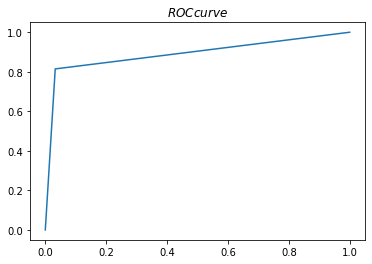

In [36]:
from sklearn.metrics import roc_auc_score,roc_curve
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

fpr,tpr,thresholds=roc_curve(y_test,predicted_cv)  #计算fpr,tpr,thresholds
auc1=roc_auc_score(y_test,predicted_cv) #计算auc

#画曲线图
plt.figure()
plt.plot(fpr,tpr)
plt.title('$ROC curve$')

In [50]:
# TF-IDF:
from sklearn.feature_extraction.text import TfidfVectorizer


tv = TfidfVectorizer(ngram_range = (1,1),stop_words='english')
X_train_tf = tv.fit_transform(X_train)
X_test_tf = tv.transform(X_test)
nb2 = MultinomialNB()
nb2.fit(X_train_tf, y_train)
predicted_tf = nb2.predict(X_test_tf)
print(classification_report(y_test, predicted_tf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1775
           1       1.00      0.84      0.91      1003

    accuracy                           0.94      2778
   macro avg       0.96      0.92      0.93      2778
weighted avg       0.95      0.94      0.94      2778



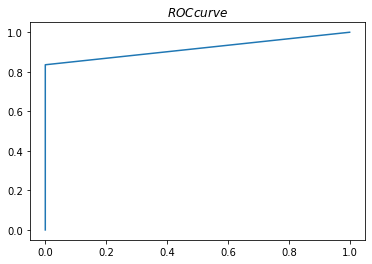

In [51]:
fpr,tpr,thresholds=roc_curve(y_test,predicted_tf)  #计算fpr,tpr,thresholds
auc=roc_auc_score(y_test,predicted_tf) #计算auc

#画曲线图
plt.figure()
plt.plot(fpr,tpr)
plt.title('$ROC curve$')
plt.show()

In [18]:
auc1

0.9758771572606124

In [52]:
## 

## Logistic Regression: 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

cv = CountVectorizer()
X_train_counts = cv.fit_transform(X_train)
X_test_counts = cv.transform(X_test)


LR = LogisticRegression()
LR.fit(X_train_counts, y_train)
predicted_lr = LR.predict(X_test_counts)
predicted_lr_pb = LR.predict_proba(X_test_counts)
print(classification_report(y_test, predicted_lr, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1775
           1       1.00      1.00      1.00      1003

    accuracy                           1.00      2778
   macro avg       1.00      1.00      1.00      2778
weighted avg       1.00      1.00      1.00      2778



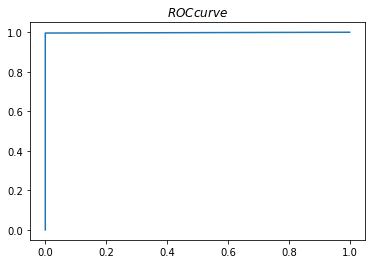

In [53]:
fpr,tpr,thresholds=roc_curve(y_test,predicted_lr)  #计算fpr,tpr,thresholds
auc=roc_auc_score(y_test,predicted_lr) #计算auc

#画曲线图
plt.figure()
plt.plot(fpr,tpr)
plt.title('$ROC curve$')
plt.show()